Set default font size to make things look prettier

In [1]:
set(0,'defaultAxesFontSize',20)

# In-class Example

First, example using the analytical solution

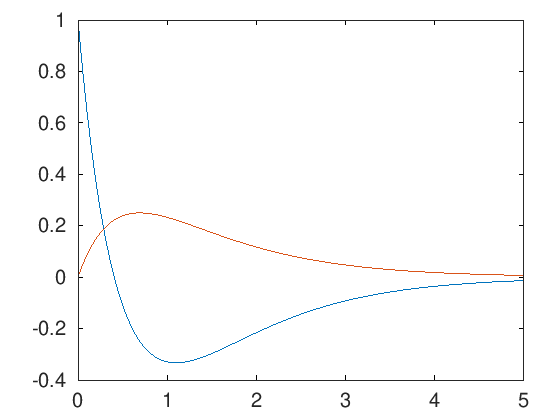

In [2]:
t = linspace(0,5,100);
c1=3;
c2=-2;

#Analytical solution for y1,y2
y1=c1*exp(-2*t)+c2*exp(-t);
y2 = -1/3*c1*exp(-2*t)-1/2*c2*exp(-t);

#Plot the solution
plot(t,y1,t,y2,'-')

Now, same example with something like ODE45

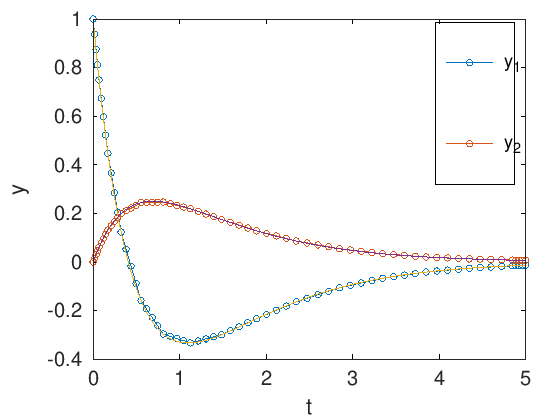

In [3]:
function yprime = example_diffeq(t, y)
    A=[-4 -6; 1 1];
    yprime=A*y;
end
    
ode45(@example_diffeq,[0 5],[1;0])
hold all;

plot(t,y1,t,y2,'-')
xlabel('t')
ylabel('y')
legend('y_1','y_2')

We could also do this without matrix form

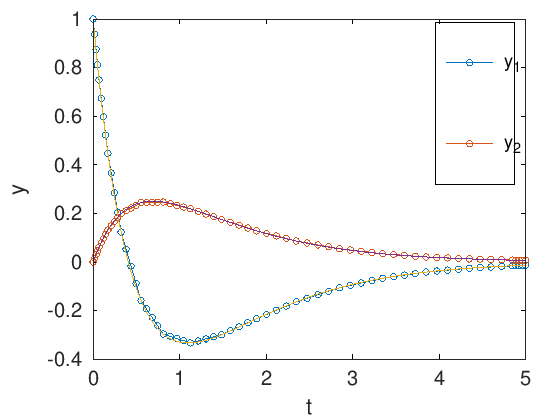

In [4]:
function yprime = example_diffeq(t, y)
    yprime=[-4*y(1)-6*y(2);
            y(1)+y(2)];
end
    
ode45(@example_diffeq,[0 5],[1;0])
hold all;

plot(t,y1,t,y2,'-')
xlabel('t')
ylabel('y')
legend('y_1','y_2')

# Tank example

In [5]:
clear all

initial_condition =

   5.00000
   0.10000

C =

   1.7267
  -1.6267



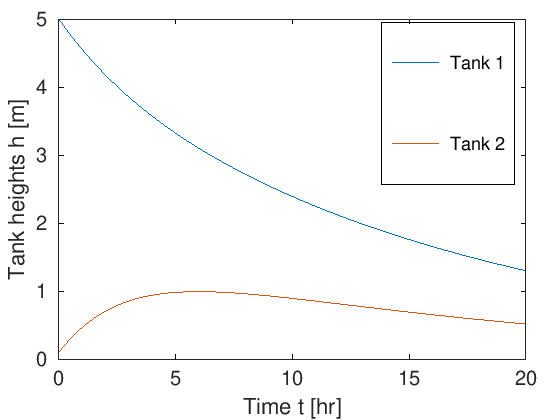

In [9]:
#Solve for the coefficients from the boundary condition
initial_condition = [5;0.1]
A0=[2.5 -0.42;
    1 1];
C=A0\initial_condition

#Calculate the analytical solution
t=linspace(0,20);
h=C(1)*[2.5;1]*exp(-0.06*t)+C(2)*[-0.42;1]*exp(-0.34*t);

#Plot the solution
plot(t,h)
xlabel('Time t [hr]')
ylabel('Tank heights h [m]')
legend('Tank 1','Tank 2')

Let's solve this with ode45

error: 'h_out' undefined near line 2 column 8


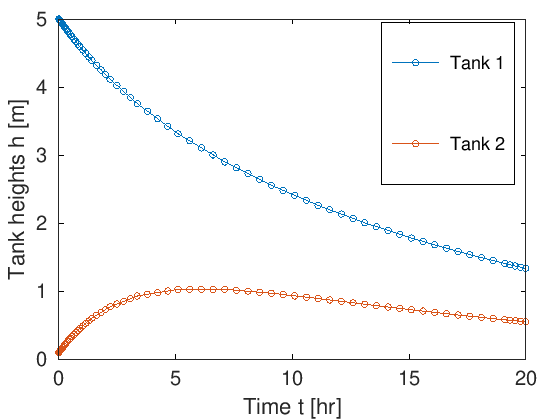

In [26]:
clear all
#Solve for the coefficients from the boundary condition
initial_condition = [5;0.1];

function hprime = tank_diffeq(t,h)
    A=[-0.1 0.1;
        0.1 -0.3];
    hprime=A*h;
end

#Calculate the analytical solution
t=[0 20];
ode45(@tank_diffeq,t,initial_condition)

#Plot the solution
plot(t,h_out)
xlabel('Time t [hr]')
ylabel('Tank heights h [m]')
legend('Tank 1','Tank 2')